In [1]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
X_train = X_train.astype('float32')

In [28]:
X_test = X_test.astype('float32')

In [30]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [31]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [22]:
X_train, X_train.max(), X_train.min()

(array([[[[0.23137255, 0.24313726, 0.24705882],
          [0.16862746, 0.18039216, 0.1764706 ],
          [0.19607843, 0.1882353 , 0.16862746],
          ...,
          [0.61960787, 0.5176471 , 0.42352942],
          [0.59607846, 0.49019608, 0.4       ],
          [0.5803922 , 0.4862745 , 0.40392157]],
 
         [[0.0627451 , 0.07843138, 0.07843138],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509805, 0.21568628],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117648, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215687, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941177, 0.19607843],
          [0.47058824, 0.32941177, 0.19607843],
          [0.42745098, 0.28627452, 0.16470589]],
 
         ...,
 
         [[0.8156863 , 0.6666667 , 0.3764706 ],
          [0.78823

Text(0.5, 1.0, 'Classe [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]')

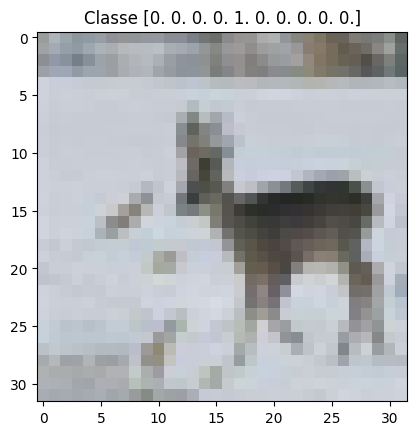

In [48]:
plt.imshow(X_train[20], cmap='gray')
plt.title("Classe " + str(y_train[20]))

In [34]:
rede_neural = Sequential()

rede_neural.add(InputLayer(shape=(32, 32, 3)))

rede_neural.add(Conv2D(32, (3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Conv2D(32, (3, 3), activation='relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size=(2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2)) # Adicionando camadas de dropout para evitar overfitting
rede_neural.add(Dense(units = 128, activation = 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units = 10, activation = 'softmax')) # Utilização de 10 neurônios na camada de saída (um para cada classe (numero 0 até 9))

In [35]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,786 (686.66 KB)

 Trainable params: 175,658 (686.16 KB)

 Non-trainable params: 128 (512.00 B)

In [36]:
rede_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
rede_neural.fit(X_train, y_train, epochs=10, batch_size=32,
                validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3849 - loss: 1.7368 - val_accuracy: 0.5469 - val_loss: 1.2836
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5830 - loss: 1.1880 - val_accuracy: 0.6074 - val_loss: 1.1213
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6412 - loss: 1.0133 - val_accuracy: 0.6143 - val_loss: 1.0893
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6874 - loss: 0.8989 - val_accuracy: 0.6298 - val_loss: 1.0982
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7142 - loss: 0.8164 - val_accuracy: 0.6443 - val_loss: 1.0348
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7357 - loss: 0.7507 - val_accuracy: 0.6867 - val_loss: 0.9061
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7582 - loss: 0.7001 - val_accuracy: 0.6577 - val_loss: 1.0039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7724 -

In [38]:
resultado = rede_neural.evaluate(X_test, y_test)
resultado

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6484 - loss: 1.1416


[1.1692900657653809, 0.6419000029563904]

In [39]:
predict = rede_neural.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [40]:
predict

array([[2.35728584e-02, 7.80742289e-03, 6.16959780e-02, ...,
        3.40021821e-03, 1.72262862e-02, 1.44712515e-02],
       [4.30679098e-02, 4.57134813e-01, 9.52741956e-08, ...,
        4.22284030e-09, 4.77782875e-01, 2.20136531e-02],
       [4.61183907e-03, 1.24747455e-02, 2.08335885e-04, ...,
        5.39297143e-05, 9.72326756e-01, 7.62094464e-03],
       ...,
       [1.01331295e-07, 4.66553063e-09, 2.41066795e-02, ...,
        2.98274815e-01, 5.84556474e-08, 5.98259305e-07],
       [1.05419736e-02, 7.58655250e-01, 1.09247491e-02, ...,
        3.81626631e-03, 5.29919937e-03, 1.84508264e-02],
       [3.14893278e-10, 1.97009119e-12, 7.06174615e-06, ...,
        9.78573620e-01, 4.11945028e-13, 1.62729968e-11]], dtype=float32)

In [42]:
# Comparando os resultados predicteds com os valores reais
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [44]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Calculando a precisão obtida pelo modelo

In [47]:
mean_absolute_error(y_test, predict)

0.08154230625761935